150
150


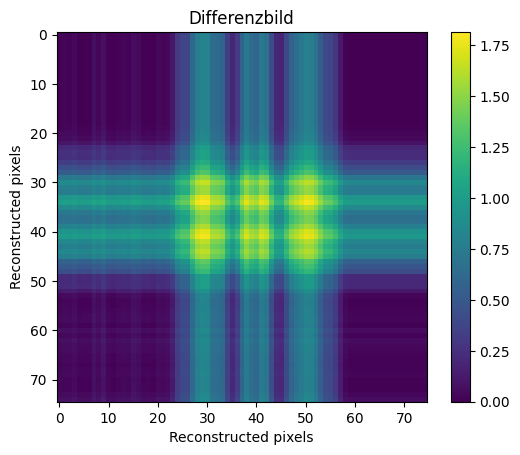

"\n#tau = '0k1'\n#omega = 0\n#get_limb('../polaris/Earth/E_t'+str(tau)+'_w'+str(omega)+'_spares/data/polaris_detector_nr0070.fits.gz',128,r'Radial intensity profile for $\tau$ = 0.1 and $\\omega$ = '+str(omega)+' ','t'+str(tau)+'_w'+str(omega)+'_radial_profile',True)\n"

In [24]:
from astropy.io import fits
from astropy import constants 
import numpy as np
import matplotlib.pyplot as plt
import os


def plotsmall(path,filename,detector,*labeln):
    prefix = "polaris_detector"
    #Define Stokes-Parameters
    intensity = []
    I_scat = []
    q = []
    u = []
    v = []

    x = []

    for i  in range(1,detector):
        if i < 10:
            with fits.open(path+'polaris_detector_nr000'+str(i)+'_sed.fits.gz') as hdu:
                intensity.append(hdu[0].data[0,0,0])
                q.append(hdu[0].data[1,0,0])
                u.append(hdu[0].data[2,0,0])
                v.append(hdu[0].data[3,0,0])
                x.append(6*i-6)
                I_scat.append(hdu[0].data[5,0,0])
        if i >= 10 and i < 100 :
            with fits.open(path + 'polaris_detector_nr00'+str(i)+'_sed.fits.gz') as hdu:
                intensity.append(hdu[0].data[0,0,0])
                q.append(hdu[0].data[1,0,0])
                u.append(hdu[0].data[2,0,0])
                v.append(hdu[0].data[3,0,0])
                x.append(3*i-3)
                I_scat.append(hdu[0].data[5,0,0])
        if i >= 100 :
            with fits.open(path + 'polaris_detector_nr0'+str(i)+'_sed.fits.gz') as hdu:
                intensity.append(hdu[0].data[0,0,0])
                q.append(hdu[0].data[1,0,0])
                u.append(hdu[0].data[2,0,0])
                v.append(hdu[0].data[3,0,0])
                x.append(3*i-3)
                I_scat.append(hdu[0].data[5,0,0])

    def pythagoras(a,b,c):
        pol =[]
        for i in range(len(a)):
            q2,u2,v2 = a[i]**2,b[i]**2,c[i]**2
            ende = q2 + u2 + v2
            pol.append(ende)
        return pol

    def pol_grad(a,b,c,d):
        pol =[]
        for i in range(len(a)):
            q2,u2,v2 = a[i]**2,b[i]**2,c[i]**2
            ende = ((q2 + u2 + v2)**(0.5)/d[i])*100
            pol.append(ende)
        return pol



    print(len(intensity))
    pol = pythagoras(q,u,v)
    if detector>40:
        alpha = np.arange(2.58,2.72,0.002)
    else:
        alpha = np.arange(2.635,2.71,0.002)
    #plt.ylabel('Norm. change of flux in rel. to ideal case')
    #plt.xlabel(r'Phase angle $\alpha$ [°]')
    deriv = np.gradient((intensity-np.min(intensity))/np.max(intensity-np.min(intensity)))
    norm_deriv = deriv/np.max(deriv)
    #plt.plot(alpha, norm_deriv,'+-',label = labeln[0])
    #plt.plot(alpha,pol_grad(q,u,v,intensity),label = labeln[0])
    #plt.legend()
    #plt.savefig(str(filename)+'.pdf')
    #'''
    return (intensity,q,u,v,I_scat,norm_deriv)


def printcommand():
    au = 14959787070.0
    alpha = np.arange(-1.95,-1.8,0.002)
    #print(alpha)
    alpha_rad = np.deg2rad(alpha)
    f = open("detector.txt", "a")
    for i in alpha_rad:
        f.write('<source_extended_star nr_photons = "1e7"> 0.0 '+str(np.sin(i)*au)+' '+str(np.cos(i)*au)+' 1.0 6000 1\n')
    alpha = np.arange(1.8,1.95,0.002)
    #print(alpha)
    alpha_rad = np.deg2rad(alpha)
    f = open("detector.txt", "a")
    for i in alpha_rad:
        f.write('<source_extended_star nr_photons = "1e7"> 0.0 '+str(np.sin(i)*au)+' '+str(np.cos(i)*au)+' 1.0 6000 1\n')
    
    f.close()
printcommand()


def get_limb(path,pixelsize,title,name,save):

    with fits.open(path) as hdu:
        intensity = hdu[0].data[0,0]
    mitte = pixelsize//2 
    print(mitte)
    distance = []
    helligkeit = []
    for i in range(pixelsize):
        for j in range(pixelsize):
            distance.append(np.sqrt((mitte-i)**2 + (mitte-j)**2))
            helligkeit.append(intensity[i,j])

    
    def partition(array, low, high,secarr):
 
        # choose the rightmost element as pivot
        pivot = array[high]
    
        # pointer for greater element
        i = low - 1
    
        # traverse through all elements
        # compare each element with pivot
        for j in range(low, high):
            if array[j] <= pivot:
            
                # If element smaller than pivot is found
                # swap it with the greater element pointed by i
                i = i + 1
    
                # Swapping element at i with element at j
                (array[i], array[j]) = (array[j], array[i])
                (secarr[i],secarr[j]) = (secarr[j],secarr[i])
    
        # Swap the pivot element with the greater element specified by i
        (array[i + 1], array[high]) = (array[high], array[i + 1])
        (secarr[i + 1],secarr[high])  = (secarr[high],secarr[i + 1])
    
    
        # Return the position from where partition is done
        return i + 1
 
    # function to perform quicksort
    
    
    def quickSort(array, low, high,secarr):
        if low < high:
        
            # Find pivot element such that
            # element smaller than pivot are on the left
            # element greater than pivot are on the right
            pi = partition(array, low, high, secarr)
    
            # Recursive call on the left of pivot
            quickSort(array, low, pi - 1,secarr)
    
            # Recursive call on the right of pivot
            quickSort(array, pi + 1, high, secarr)
 
    quickSort(distance,0,len(distance)-1,helligkeit)
    averaged_intensity = []
    averaged_distance = []
    window = 50
    for i in range(len(distance)-window+1):
        averaged_distance.append(np.mean(distance[i:i+window]))
        averaged_intensity.append(np.mean(helligkeit[i:i+window]))
    plt.plot(averaged_distance,averaged_intensity,'-')
    plt.xlim(0,45)
    plt.xlabel('Distance to subobserver Point [Pixels]')
    plt.ylabel(r'Intensity [ Jy]')
    plt.title(str(title))
    if save:
        plt.savefig(str(name)+'.pdf')
    print(np.max(intensity))
    

def plot_theo_area():
    alpha = np.arange(2.58,2.72,0.002)
    alpha_rad = np.deg2rad(alpha)
    #print(alpha_rad)
    r_star = 695700000
    r_planet = 6371000  #69911000  #Jupiter
    au = 14959787070.0
    are=[]
    def area(r_planet,r_star,e):
        ar = r_planet**2*np.arccos((e**2+r_planet**2-r_star**2)/(2*e*r_planet))+r_star**2*np.arccos((e**2+r_star**2-r_planet**2)/(2*e*r_star))-0.5*np.sqrt((-e+r_planet+r_star)*(e+r_planet-r_star)*(e-r_planet+r_star)*(e+r_planet+r_star))
        return ar
    distance = []
    for i in alpha_rad:
        e = np.sin(i)*au
        distance.append(e)
    dis = np.linspace(0.1,r_star+r_planet,1000)
    arr = []
    for d in distance:
        arr.append(np.pi*r_planet**2 - area(r_planet,r_star,d))
    #print(arr)
    arr = np.array(arr)
    #plt.plot(alpha,arr/125869242926080.81,label = 'Theo')
    norm_arr = arr/125869242926080.81
    deriv = np.gradient(norm_arr)
    norm_deriv = deriv/np.nanmax(deriv)
    #plt.plot(alpha,norm_deriv)
    #plt.plot(alpha,norm_arr)
    plt.legend()
    #plt.title('Theoretical normalized intensity')
    plt.xlabel(r'Phase angle $\alpha$ [°]')
    plt.ylabel(r'Normalized change of area ')
    #plt.savefig('theo_int.pdf')
    return norm_deriv
    #plt.savefig('theo_area.pdf')


def plot_surface(data):
    #split the data
    map_size = len(data)//2
    ingress = data[:map_size]
    egress = data[map_size-2:]
    
    # Create an empty array to hold the albedo data
    albedo_map = np.zeros((map_size, map_size))

    for i in range(map_size):
        for j in range(map_size):
            albedo_map[i,j] = abs(ingress[j])+abs(egress[i])
    
    return albedo_map, ingress, egress

#'''
path_theo = "../polaris/Earth/inclined_ideal_high_res/data/"
path_prak =  "../polaris/Earth/inclined_t10_clouds/data/"
data_theo = plotsmall(path_theo,'inkl0k26',151,r'$\tau$ = 0')
data_prak = plotsmall(path_prak,'inkl0k26',151,r'$\tau$ = 0')
data_prak = data_prak[-1]
data_theo = data_theo[-1]
#plt.xlim(20,60)
#plt.ylim(20,55)
#plt.plot(np.gradient(data_prak[:len(data_prak)//2]),label='Ingress')
#plt.plot(np.gradient(data_prak[len(data_prak)//2-2:]),label='Egress')
#plt.legend()
#print(np.max(data_prak))
albedo_map_plot = plot_surface(data_prak)[0]
theo_albedo_map = plot_surface(data_theo)[0]   
plt.imshow(albedo_map_plot)
plt.colorbar()
plt.xlabel('Reconstructed pixels')
plt.ylabel('Reconstructed pixels')
#plt.plot(data)
#plt.ylim(49.362,49.364)
plt.title('Differenzbild')
#plt.savefig('recon_diff.pdf')
plt.show()

#for_real1 = plotsmall(path,'inkl0k26',72,r'$\tau$ = 0')
#plotsmall(path2,'inkl0k26',r'$\tau$ = 0.1')
#plotsmall(path3,'inkl0k26',39,r'tau = 10,w = 1')
#for_real1 = plotsmall(path4,'inkl0 k26',72,r'$\tau$ = 0.1,$\omega$ = 0')
#theo = plotsmall(path,'inkl0 k26',72,r'$\tau$ = 0,$\omega$ = 1')

#theo = plot_theo_area()
#diff = for_real1 -theo
#plt.plot(alpha,(diff-np.nanmin(diff))/(np.nanmax(diff)-np.nanmin(diff)))
#plt.xlim(10,60)
#plt.title(r'$\omega$ = 1')
#plt.savefig('rel1.pdf')
#''' 
'''
#tau = '0k1'
#omega = 0
#get_limb('../polaris/Earth/E_t'+str(tau)+'_w'+str(omega)+'_spares/data/polaris_detector_nr0070.fits.gz',128,r'Radial intensity profile for $\tau$ = 0.1 and $\omega$ = '+str(omega)+' ','t'+str(tau)+'_w'+str(omega)+'_radial_profile',True)
'''

In [7]:
np.arange(1.8,2,0.05)


array([1.8 , 1.85, 1.9 , 1.95])